In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def OU(T,dt, tau, sigma):
    N = int(T/dt)
    x = np.zeros(N)
    for t in range(N-1):
        x[t+1] = x[t] -x[t]/tau*dt + sigma*np.random.normal()*np.sqrt(dt)
    return x

In [235]:
T = 5
dt = 0.002
### I'm running two Ornstein Uhlenbeck processes to simulate two EEG signals (working as if I have two channels)
x1 = OU(T,dt,4,3)
x2 = OU(T,dt,4,3)

In [244]:
t = np.arange(0,T,dt)

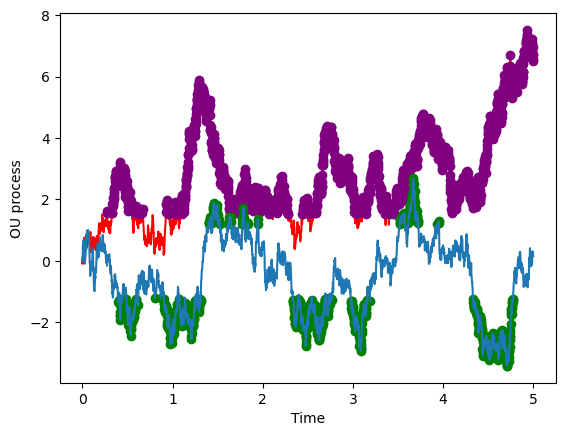

In [239]:
plt.plot(t,x1, 'r')
thr = 1
plt.plot(t[np.abs(x1) > np.std(x1)*thr],x1[np.abs(x1) > np.std(x1)*thr], 'o', color ='purple')
plt.plot(t[np.abs(x2) > np.std(x2)*thr],x2[np.abs(x2) > np.std(x2)*thr], 'go')

plt.plot(t,x2);
plt.xlabel('Time')
plt.ylabel('OU process');
#plt.xlim(14,16);

In [85]:
av_indice.shape

(246,)

In [205]:
final_t.max()

2.0

In [265]:


final_t = np.array(np.array(np.abs(x1) > np.std(x1)*thr, dtype = float) + np.array(np.abs(x2) > np.std(x2)*thr, dtype = float), dtype = bool) 
#### UP ABOVE you have to merge all of your channel 
final_t = np.array(final_t, dtype = float)

In [279]:
av_indice_start = np.where((final_t[1:] - final_t[:-1]) >0)[0]### these are the indices where an avalanche begins
av_indice_end = np.where((final_t[1:] - final_t[:-1])< 0)[0]### these are the indices where an avalanche ends

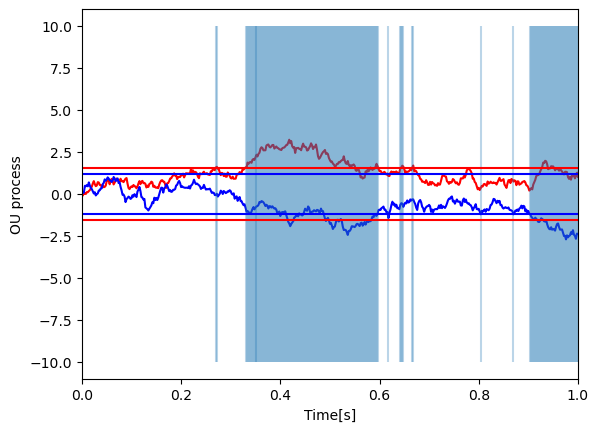

In [297]:
plt.plot(t,(x1), 'r')
plt.plot(t,x2,'b')

#
plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha =   0.3)

#plt.xlim(12,16.5)
plt.hlines(np.std(x1), 0,T,'r')
plt.hlines(-np.std(x1), 0,T,'r')

plt.hlines(np.std(x2), 0,T,'b')
plt.hlines(-np.std(x2), 0,T,'b')

plt.xlabel('Time[s]')
plt.ylabel('OU process');
plt.xlim(0.,1);

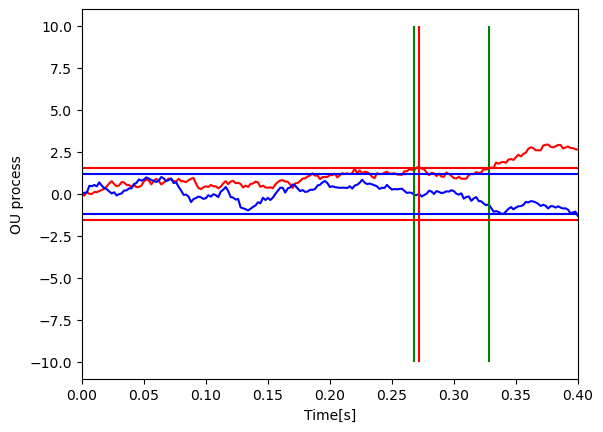

In [298]:
plt.plot(t,(x1), 'r')
plt.plot(t,x2,'b')


plt.vlines(t[av_indice_start],-10,10, color = 'green')
plt.vlines(t[av_indice_end],-10,10, color = 'red')

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha =   0.3)


plt.hlines(np.std(x1), 0,T,'r')
plt.hlines(-np.std(x1), 0,T,'r')

plt.hlines(np.std(x2), 0,T,'b')
plt.hlines(-np.std(x2), 0,T,'b')

plt.xlabel('Time[s]')
plt.ylabel('OU process');
plt.xlim(0,0.4);

In [280]:
if len(av_indice_start) < len(av_indice_end):
    av_indice_start = av_indice_start.tolist()
    av_indice_start.append(0)

    
if len(av_indice_start) > len(av_indice_end):
    #print(av_indice_end)
    av_indice_end = av_indice_end.tolist()
    av_indice_end.append(len(x1)-1)

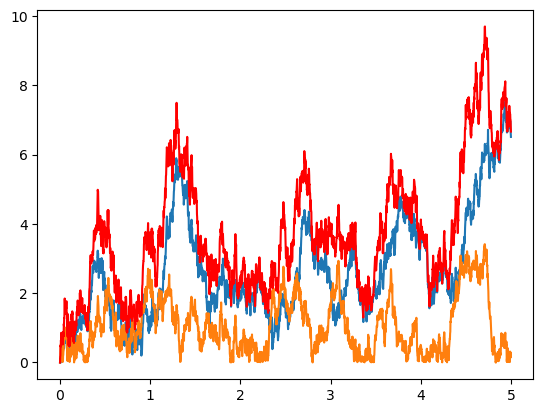

In [299]:
global_signal = (np.abs(x1) + np.abs(x2))
plt.plot(t,np.abs(x1) )
plt.plot(t,np.abs(x2) )
plt.plot(t,global_signal,'r' )

In [281]:
len(av_indice_start) ,len(av_indice_end)

(33, 33)

In [282]:
global_signal = (np.abs(x1) + np.abs(x2))

avalanche_sizes = []
avalanche_dur = []

for s in range(len(av_indice_start)):
    if len(av_indice_start) != len(av_indice_end):
        print('Error, they must be of the same length')
        break
    avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
    avalanche_dur.append(t[av_indice_end[s]]- t[av_indice_start[s]])
    

In [283]:
len(avalanche_sizes), len(avalanche_dur)

(33, 33)

In [284]:
avalanche_dur

[0.0040000000000000036,
 0.26799999999999996,
 0.0020000000000000018,
 0.008000000000000007,
 0.0040000000000000036,
 0.0020000000000000018,
 0.0020000000000000018,
 0.15000000000000002,
 0.0020000000000000018,
 0.0020000000000000018,
 0.552,
 0.010000000000000009,
 0.006000000000000005,
 0.0040000000000000036,
 0.04200000000000004,
 0.3480000000000001,
 0.002000000000000224,
 0.038000000000000256,
 0.04400000000000004,
 0.11799999999999988,
 0.002000000000000224,
 0.002000000000000224,
 0.06200000000000028,
 0.0019999999999997797,
 0.13600000000000012,
 0.8139999999999996,
 0.026000000000000245,
 0.008000000000000007,
 0.014000000000000234,
 0.009999999999999787,
 0.0019999999999997797,
 0.0019999999999997797,
 1.5420000000000003]